# Predicting NBA Rebounds Using Linear Regression
#### Gabriel Ureta 

<h1>Table of contents</h1>
<ul>
    <li><a href="#ref1">Introduction </a></li>
    <li><a href="#ref2">Setting up Data </a></li>
    <li><a href="#ref3">Exploratory Analysis </a></li>
    <li><a href="#ref4">Regression</a></li>
    <li><a href="#ref5">Conclusion</a></li>
</ul>



## Introduction <a name="ref1"></a>

Rebounds are one of the most important aspects of winning basketball games. Being able to  collect offensive rebounds give your team extra chances, free throw opportunities, and frustrates the defense. Defensive rebounds are a key part of good defense in general, limiting the offense to just one shot. In this simple project, **the rebounding performance of NBA players is modeled using multiple linear regression**. Possible explanatory variables such as **Height**, **Weight**, **Age**, and **playing role** were evaluated. The questions we want to answer are:

* What are the factors that affect  a player's ability to get rebounds? Can we model it?
* Based on these factors, which players are playing better than the model? Which are underperforming?

## Setting up Data  <a name="ref2"></a>
The stats were taken from NBA.com for players in the 2019-2020 season. Rebounding performance for the entirety of NBA history were not considered due to lack of data and possible change of performance through the years.
  
These are actually stats'per 100 possessions', that is, these are stats you would expect a player to make if they played the same number of possesions (100 a game). The reason for not using 'per game average' is that some players play more minutes than others. A team could have two quality rebounding centers that split minutes, and if they moved to a different team they could easily double their numbers. This could be solved by adding the "minutes played" as another explanatory variable, but this will also artificially increase the R-squared performance. Another reasonable way is to use 'per minute average', but basketball gameplay speed differs per team. A team that plays fast will try to score more often and therefore have more chances to get rebounds. 'Per 100 possessions' will take that into account. One problem is that players who play more minutes will fatigue more than players who play less minutes, so players who typically play less minutes will have an inflated 'per 100' stat. Some sort of fatigue factor could probably correct this, but it is assumed that fatigue is neglible. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Loading data with biometrics (height, weight) and playing position.
df1 = pd.read_html('NBA%20Players%20&%20Team%20Rosters%20_%20NBA.com.html')[0]

In [3]:
#number of players in the dataframe
print(df1.shape)
df1.head()

(545, 8)


,Player,Team,Number,Position,Height,Weight,Last Attended,Country
0,PreciousAchiuwa,MIA,15.0,F,6-9,225 lbs,Memphis,Nigeria
1,JaylenAdams,MIL,10.0,G,6-0,225 lbs,St. Bonaventure,USA
2,StevenAdams,NOP,12.0,C,6-11,265 lbs,Pittsburgh,New Zealand
3,BamAdebayo,MIA,13.0,C-F,6-9,255 lbs,Kentucky,USA
4,LaMarcusAldridge,SAS,12.0,C-F,6-11,250 lbs,Texas,USA


In [4]:
#Loading player 'per 100 possesion' stats
df2 = pd.read_html('NBA.com_Stats%20_%20Players%20Traditional.html')[0]

In [5]:
#number of players in the dataframe
print(df2.shape)
df2.head()

(529, 56)


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,PF RANK,FP RANK,DD2 RANK,TD3 RANK,+/- RANK
0,1,James Harden,HOU,30,68,43,25,46.7,43.9,12.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Giannis Antetokounmpo,MIL,25,63,51,12,44.6,43.2,15.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Dusty Hannahs,MEM,26,2,0,2,46.3,41.4,13.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Luka Doncic,DAL,21,61,36,25,47.3,40.6,13.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Kawhi Leonard,LAC,29,57,41,16,47.7,39.8,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#list of statistics
df2.columns

Index(['Unnamed: 0', 'PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3',
       '+/-', 'GP RANK', 'W RANK', 'L RANK', 'MIN RANK', 'PTS RANK',
       'FGM RANK', 'FGA RANK', 'FG% RANK', '3PM RANK', '3PA RANK', '3P% RANK',
       'FTM RANK', 'FTA RANK', 'FT% RANK', 'OREB RANK', 'DREB RANK',
       'REB RANK', 'AST RANK', 'TOV RANK', 'STL RANK', 'BLK RANK', 'PF RANK',
       'FP RANK', 'DD2 RANK', 'TD3 RANK', '+/- RANK'],
      dtype='object')

Checking for duplicates:

In [7]:
pd.Series(df1['Player']).is_unique

True

In [8]:
pd.Series(df2['PLAYER']).is_unique

True

Since there are no spaces in between the first and last names of df1, the spaces in df2 will also be removed for merging:

In [9]:
df2['PLAYER'] = df2['PLAYER'].str.replace(' ','')
df1['PLAYER'] = df1['Player'].str.replace(' ','')

In [10]:
df3 = df1.merge(df2, left_on='Player', right_on='PLAYER')
print(df3.shape)
df3.head()

(441, 65)


,Player,Team,Number,Position,Height,Weight,Last Attended,Country,PLAYER_x,Unnamed: 0,...,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,PF RANK,FP RANK,DD2 RANK,TD3 RANK,+/- RANK
0,StevenAdams,NOP,12.0,C,6-11,265 lbs,Pittsburgh,New Zealand,StevenAdams,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BamAdebayo,MIA,13.0,C-F,6-9,255 lbs,Kentucky,USA,BamAdebayo,135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LaMarcusAldridge,SAS,12.0,C-F,6-11,250 lbs,Texas,USA,LaMarcusAldridge,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KyleAlexander,MIA,17.0,F-C,6-10,216 lbs,Tennessee,Canada,KyleAlexander,519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NickeilAlexander-Walker,NOP,0.0,G,6-5,205 lbs,Virginia Tech,Canada,NickeilAlexander-Walker,182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A few players were removed due to having null values during the merge. This is okay, since these were fringe players without statistics or biometrics.

In [11]:
#Checking column names in new combined dataframe
df3.columns

Index(['Player', 'Team', 'Number', 'Position', 'Height', 'Weight',
       'Last Attended', 'Country', 'PLAYER_x', 'Unnamed: 0', 'PLAYER_y',
       'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM',
       '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'GP RANK', 'W RANK',
       'L RANK', 'MIN RANK', 'PTS RANK', 'FGM RANK', 'FGA RANK', 'FG% RANK',
       '3PM RANK', '3PA RANK', '3P% RANK', 'FTM RANK', 'FTA RANK', 'FT% RANK',
       'OREB RANK', 'DREB RANK', 'REB RANK', 'AST RANK', 'TOV RANK',
       'STL RANK', 'BLK RANK', 'PF RANK', 'FP RANK', 'DD2 RANK', 'TD3 RANK',
       '+/- RANK'],
      dtype='object')

Only players that played at least 10 games will be considered to remove outliers. 
Removing players with less than 10 games:

In [12]:
df3 = df3[df3['GP'] >=10]

In [13]:
#Checking number of players
print(df3.shape)
#Checking if at least 10 games were played
df3['GP'].unique()


(400, 65)


array([63, 72, 53, 47, 38, 70, 18, 10, 67, 20, 58, 69, 57, 39, 62, 29, 56,
       22, 42, 68, 61, 55, 43, 54, 51, 48, 66, 49, 73, 65, 19, 17, 52, 46,
       30, 14, 24, 45, 64, 26, 35, 28, 59, 71, 15, 33, 11, 41, 36, 37, 50,
       13, 44, 34, 31, 60, 21, 32, 25, 12, 74, 23, 16, 40, 27],
      dtype=int64)

The player heights are listed in feet and inches (e.g. "6-1").   
Converting player heights from string to float (inches):

In [14]:
df3['Height'].dtypes

dtype('O')

In [15]:
#function for converting height to inches:
def parse_ht(ht):
    # format: "6-0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_


In [16]:
#check function
print(parse_ht("5-9"))

69.0


In [17]:
#applying function to 'Height' column
df3['Height'] = df3['Height'].apply(parse_ht)
df3['Height'].head()

0    83.0
1    81.0
2    83.0
4    77.0
5    76.0
Name: Height, dtype: float64

Likewise, the weight function was also a string with units  (e.g. "155 lbs").  
Removing 'lbs' from the Weight column:

In [18]:
#function to remove "lbs" and convert to float
def parse_wt(wt):
    # format: "155 lbs"
    wt_ = wt.split(" ")
    w = float(wt_[0])
    return (w)

In [19]:
#check function
print(parse_wt("155 lbs"))

155.0


In [20]:
#applying function
df3['Weight'] = df3['Weight'].apply(parse_wt)
df3['Weight'].head()

0    265.0
1    255.0
2    250.0
4    205.0
5    198.0
Name: Weight, dtype: float64

## Exploratory Analysis  <a name="ref3"></a>  
First, the correlation between the explanatory variables (height, weight, age, playing role) with the explained variables (total rebounds) will have to be determined. If there is a linear correlation wherein the increase of one variable corresponds to an increase in another, then it can be used for regression. Otherwise, other non-linear relationships can be investigated.


In [21]:
#importing libraries for metrics and visualization 
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt

#### Height vs Rebounds

Height is the most obvious factor that can affect rebounds. The taller the player, the more likely he will get rebounds.  
Correlation between height and rebounds:

In [22]:
corr, p = stats.pearsonr(df3['Height'],df3['REB'])
print('Correlation Coefficient is', corr)
print('P-value is', p)

Correlation Coefficient is 0.7150837965516195
P-value is 7.208308140460025e-64


C:\Users\pc user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


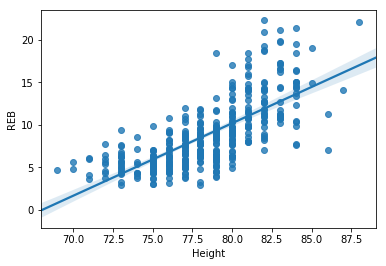

In [23]:
#scatter plot of height vs rebounds
sns.regplot(x = df3['Height'], y = df3['REB'])

From the plot, it can be assumed that a logarithmic/sigmoidal or polynomial function can also fit the graph. However, the linear model looks like a good enough fit and wont be that far from a non-linear function.

#### Weight vs Rebounds

Weight should increase the player's ability to "box out". However, weight will also increase with height, so this will increase the inflation of regression. This multicollinearity should be kept in mind.  
Correlation between weight and rebounds:

In [24]:
corr, p = stats.pearsonr(df3['Weight'],df3['REB'])
print('Correlation Coefficient is', corr)
print('P-value is', p)

Correlation Coefficient is 0.6956247148409095
P-value is 3.9199981638917293e-59


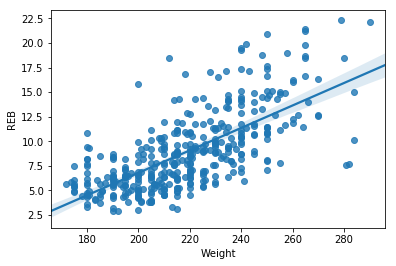

In [25]:
#scatter plot of weight vs rebounds
sns.regplot(x = df3['Weight'], y = df3['REB'])

Like Height vs Rebounds, it can be assumed that a logarithmic/sigmoidal or polynomial function can also fit the WEight vs Rebounds graph. However, the linear model looks like a good enough fit and wont be that far from a non-linear function.

#### 3PA vs Rebounds

If the player is a 3-point shooter, then it is more likely that the player will have less rebounds due to being naturally positioned farther from the ring. The amount of 3 pointers attempted should give a negative correlation.

Correlation between 3 pointers attempted and rebounds:

In [26]:
corr, p = stats.pearsonr(df3['3PA'],df3['REB'])
print('Correlation Coefficient is', corr)
print('P-value is', p)

Correlation Coefficient is -0.5431707497449159
P-value is 4.463153974530817e-32


3 pointers attempted should only affect offensive rebounds since they are only taking 3 pointers during offensive possession. 3PA should only have a small impact on defensive rebounds.  
Correlations of number of 3 point attempts to offensive (OREB) and defensive (DREB) rebounds:

In [27]:
#offensive rebounds
corr, p = stats.pearsonr(df3['3PA'],df3['OREB'])
print('Correlation Coefficient is', corr)
print('P-value is', p)

Correlation Coefficient is -0.6801887919784204
P-value is 1.2244613950859554e-55


In [28]:
#defensive rebounds
corr, p = stats.pearsonr(df3['3PA'],df3['DREB'])
print('Correlation Coefficient is', corr)
print('P-value is', p)

Correlation Coefficient is -0.389404979983233
P-value is 6.212802064351255e-16


It is clear that 3 point attempts affect the offensive rebounds more, but since it also affects the defensive rebounds significantly, it will be included as an explanatory variable for total rebounds

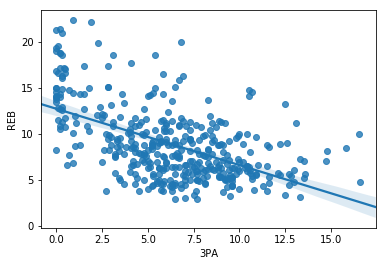

In [29]:
#scatter plot of 3PA vs rebounds
sns.regplot(x = df3['3PA'], y = df3['REB'])

From looking at the plot, it is clear that there is a higher count for rebounds at lower 3PA than the linear model. A look at the residual plot will determine if a non-linear model would be better.

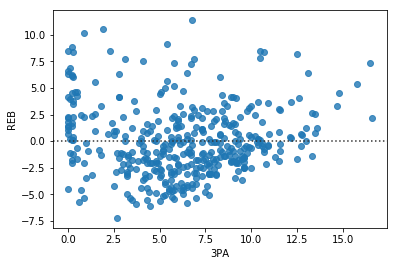

In [30]:
#residual plot of 3PA vs rebounds
sns.residplot(x = df3['3PA'], y = df3['REB'])

#### Curve fitting and linearization of 3PA
The trend from the scatter and residual plots show a non-linear relationship. From an initial look at the plot, a steep inversed sigmoidal function could be a good approximation, since logically it should have a steep decrease, and then a slow decrease at the end. The equation is a sigmoidal/logistic function subtracted from a constant alpha_1:

$$ \hat{Y} = \alpha_1 -\alpha_2 (\frac1{1+e^{\beta_1(X-\beta_2)}})$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis,

$\alpha_1$: The equation is inversed by substracting from this constant,

$\alpha_2$: Adjusts the size of the sigmoidal/logistic function.

In [31]:
#function for the sigmoid
def sigmoid(x, alpha_1, alpha_2, Beta_1, Beta_2):
     y = alpha_1 - alpha_2*(1 / (1 + np.exp(-Beta_1*(x-Beta_2))))
     return y

The function **curve_fit** from scipy will be used to get the parameters alpha_1, alpha_2, beta_1, beta_2.  
Normalizing the independent and response variables and getting the parameters:

In [32]:
#Normalizing:
X = df3['3PA']/ max(df3['3PA'])
Y = df3['REB']/ max(df3['REB'])
#Curve fitting:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X, Y)
#print the final parameters
print("alpha_1 = %f,alpha_2 = %f,  beta_1 = %f, beta_2 = %f" % (popt[0], popt[1],popt[2],popt[3]))

alpha_1 = 1.615791,alpha_2 = 1.315918,  beta_1 = 6.072699, beta_2 = -0.142173


The parameters can then be used to plot the new curve(blue) alongside the old (red):

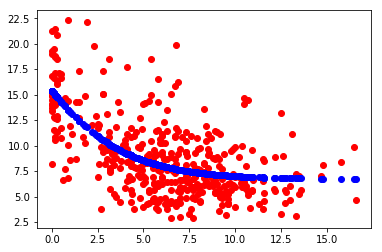

In [33]:
y_new = sigmoid(X,popt[0], popt[1],popt[2],popt[3])
plt.plot(df3['3PA'],df3['REB'], 'ro', label='data')
#y_new must be multiplied against max(df3['REB']) to get the proper scale from the normalization:
plt.plot( df3['3PA'],y_new*max(df3['REB']), 'bo')

The new curve fits the plot better than the linear model of 3PA. To linearize 3PA, the new curve of 3PA will be plotted against total rebounds:

In [34]:
#The linearized 3PA is therefore only "- y_new*max(df3['REB'])". 
#The negative sign is to re-introduce the negative relationship which was taken from curve-fitting.
linear_3PA = - y_new*max(df3['REB'])
#Correlation of linearized 3PA to REB:
corr, p = stats.pearsonr(linear_3PA,df3['REB'])
print('Correlation Coefficient is', corr)
print('P-value is', p)

Correlation Coefficient is -0.6229229121583919
P-value is 2.314593495789708e-44


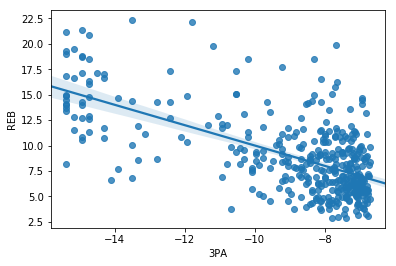

In [35]:
#scatter plot of  linearized 3PA vs rebounds
sns.regplot(x = linear_3PA, y = df3['REB'])

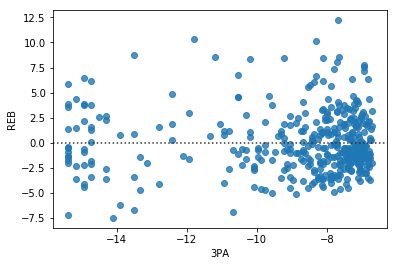

In [36]:
#residual plot of linearized3PA vs rebounds
sns.residplot(x = linear_3PA, y = df3['REB'])

The scatter plot of the 3PA now follows rebounds linearly, and its residual plot appears more randomized.

#### 3PA vs Rebounds
The theory is that rebounds should be correlated with player athleticism. As they reach their athletic peak in age, their rebounds should increase. After their peak, their rebounds should decline with age.
  
Correlation between player age and rebounds:

In [37]:
corr, p = stats.pearsonr(df3['AGE'],df3['REB'])
print('Correlation Coefficient is', corr)
print('P-value is', p)

Correlation Coefficient is 0.01218585679062407
P-value is 0.8080337163947775


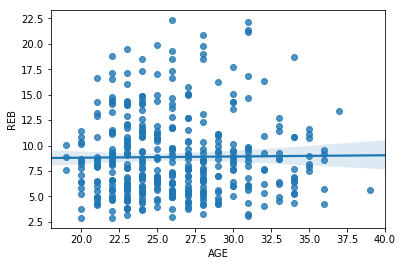

In [38]:
#scatter plot of age vs rebounds
sns.regplot(x = df3['AGE'], y = df3['REB'])

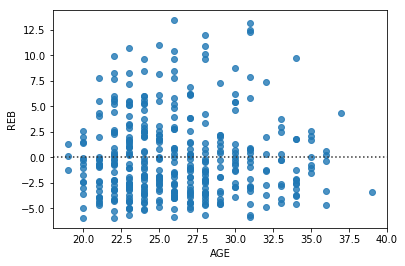

In [39]:
#residual plot of age vs rebounds
sns.residplot(x = df3['AGE'], y = df3['REB'])

There isnt much of a correlation, but the scatter plot makes it look like there is a trend. The rebounds should increase towards the mid-20's and decrease in the 30's following athletic peak. The data seems to follow this to some extent. However, most of the data does not seem to follow this so curve fitting will be made.

#### Curve fitting and linearization of AGE
One good approximation for the trend is a quadratic function:

$$ \hat{Y} = \alpha X^2 + \beta X + \gamma $$



In [40]:
#function for the quadratic
def quad(x, alpha, beta, gamma):
     y2 = alpha*x**2 + beta*x + gamma
     return y2

The function **curve_fit** from scipy will be used to get the parameters alpha, beta, and gamma. 
Normalizing the independent and response variables and getting the parameters:

In [41]:
#Normalizing:
X2 = df3['AGE'] / max(df3['AGE'])
Y2 = df3['REB'] / max(df3['REB'])
#Curve fitting:
popt2, pcov = curve_fit(quad, X2, Y2)
#print the final parameters
print("alpha = %f,beta = %f,  gamma = %f" % (popt2[0], popt2[1],popt2[2]))

alpha = -0.850727,beta = 1.214346,  gamma = -0.024622


The parameters can then be used to plot the new curve(blue) alongside the old (red):

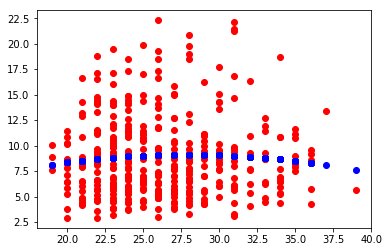

In [42]:
y_new2 = quad(X2,popt2[0], popt2[1],popt2[2])
plt.plot(df3['AGE'],df3['REB'], 'ro')
#y_new must be multiplied against max(df3['REB']) to get the proper scale from the normalization:
plt.plot( df3['AGE'],y_new2*max(df3['REB']), 'bo')

The new curve fits the plot better than the linear model of AGE. To linearize AGE, the new curve of AGE will be plotted against total rebounds:

In [43]:
#The linearized AGE is therefore only "y_new2*max(df3['REB'])". 
linear_AGE = y_new2*max(df3['REB'])
#Correlation of linearized AGE to REB:
corr, p = stats.pearsonr(linear_AGE,df3['REB'])
print('Correlation Coefficient is', corr)
print('P-value is', p)

Correlation Coefficient is 0.06123048249442065
P-value is 0.22173635900790326


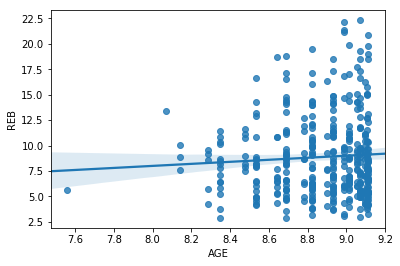

In [44]:
#scatter plot of  linearized AGE vs rebounds
sns.regplot(x = linear_AGE, y = df3['REB'])

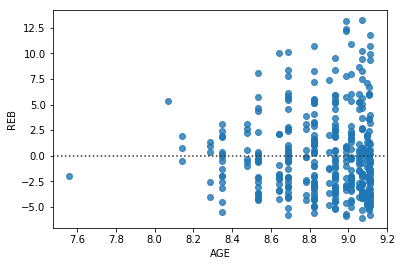

In [45]:
#residual plot of  linearized AGE vs rebounds
sns.residplot(x = linear_AGE, y = df3['REB'])

The residuals still do not look randomized even after curve-fitting. Also, since the correlation is really low with a greater than 0.1 P-value(low confidence), **age ideally should not be considered for Regression**. However, for this project, it will be included since the logic is sound and a larger data set will definitely increase the P-value,

#### Player position vs Rebounds

Player position can also be used as an explanatory variable, since traditional roles like forwards and centers will definitely get more rebounds. However, the NBA has become more "positionless" over the years and modern bigs can now play as guards and shoot 3-pointers. Also, height (dictates traditiona defensive role) and 3PA (dictates offensive role) have already been accounted for, so this part is already accounted for. The correlation between Player position and rebounds, height, and 3PA are shown below.

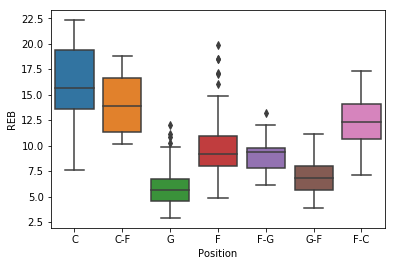

In [46]:
#correlation between position and rebounds
sns.boxplot(x=df3['Position'], y=df3['REB'])

#### Player position vs Height

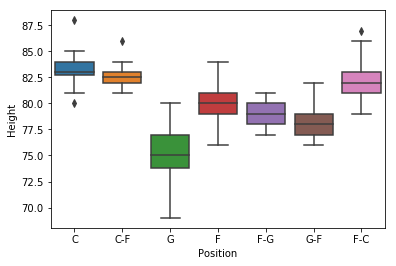

In [47]:
#correlation between position and height
sns.boxplot(x=df3['Position'], y=df3['Height'])

It is clear that player positions are related to height, with Centers (C) being the tallest and Guards (G) being the shortest. We can also show that shorter players (guards and forwards) will tend to shoot more 3's, and that centers will tend to shoot near the ring to make use of their height.

#### Player position vs 3PA

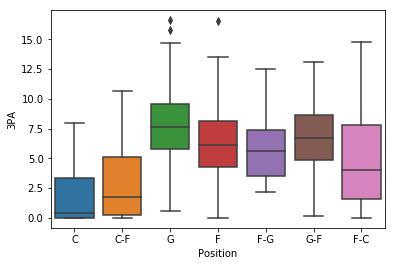

In [48]:
#correlation between position and 3PA
sns.boxplot(x=df3['Position'], y=df3['3PA'])

## Regression  <a name="ref4"></a>

For the model, only Height, Weight, Age, and 3 points attempted will be considered as explanatory variables.

In [49]:
#Dataframe for variables
data = df3[['Player','Team','3PA','AGE','Height','Weight','REB']]
#replacing 3PA with curve fitted 3PA
data['3PA'] = linear_3PA 
#replacing AGE with curve fitted 3PA
data['AGE'] = linear_AGE 
data.head()

C:\Users\pc user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pc user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Player,Team,3PA,AGE,Height,Weight,REB
0,StevenAdams,NOP,-15.169612,9.072549,83.0,265.0,16.6
1,BamAdebayo,MIA,-14.735286,8.689910,81.0,255.0,14.8
2,LaMarcusAldridge,SAS,-9.047593,8.640433,83.0,250.0,10.8
4,NickeilAlexander-Walker,NOP,-6.960194,8.531886,77.0,205.0,6.5
5,GraysonAllen,MEM,-7.156602,8.931121,76.0,198.0,5.4


In [50]:
#checking for null values
data.isnull().sum()

Player    0
Team      0
3PA       0
AGE       0
Height    0
Weight    0
REB       0
dtype: int64

In order to test for out of sample accuracy, the data will be split into training and testing sets:

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['3PA','AGE','Height','Weight']],data['REB'], test_size = 0.3, random_state = 1)

Normalizing so that each explanatory variable has equal dimensional size:

In [52]:
from sklearn import preprocessing
#normalizing explanatory variables in training set:
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
#normalizing explanatory variables in testing set:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
#normalizing explanatory variables as a whole:
X_whole= preprocessing.StandardScaler().fit(data[['3PA','AGE','Height','Weight']]).transform(data[['3PA','AGE','Height','Weight']])

Since the 3PA and AGE were linearized, linear regression can be used.  
Fitting the linear regression model:

In [53]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit (X_train, y_train)
# The coefficients
print ("Coefficients: 3PA = %f, AGE = %f,  Height = %f,  Weight = %f" % (lm.coef_[0], lm.coef_[1],lm.coef_[2],lm.coef_[3]) )

Coefficients: 3PA = -1.308000, AGE = 0.316701,  Height = 1.123727,  Weight = 1.290512


Surpisingly, 3PA has a higher coefficient than both height and weight. But then again, **weight and height are multicolinear**, so the overall size of the player will still be a bigger factor than 3PA. **If the model is fitted without weight, then height would have a higher coefficient than 3PA. If the model is fitted without height, then weight will have a higher coefficient than 3PA**. 

In [54]:
#predicted rebounds using test set:
y_hat = lm.predict(X_test)
lm.score(X_test,y_test)

0.6830774410899592

In [55]:
#additional metrics
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_test,y_hat ) )

Mean absolute error: 1.83
Residual sum of squares (MSE): 5.56
R2-score: 0.68


The MAE and MSE are not large, and the R2-score is respectable. A more comprehensive way to test the data is by using **cross_val_score**, which is by splitting the data into multiple different training and testing sets. This can check if the R-squared value was high by chance. 

In [56]:
from sklearn.model_selection import cross_val_score

The cross validation score is taken by splitting data into 10 folds, and then testing each fold with remaining data as training sets.

In [57]:
Rcross = cross_val_score(lm, X_whole, data['REB'], cv=10)
print("Cross validation scores are:",Rcross)
print("Cross validation score mean is:",np.mean(Rcross))

Cross validation scores are: [0.58854863 0.65708491 0.66256149 0.51524812 0.6543369  0.54379945
 0.75611076 0.62598361 0.71230222 0.67674909]
Cross validation score mean is: 0.6392725174765566


Since the R-squared value is okay for out of sample data, the model as a whole can then be fitted and evaluated:

In [58]:
#fitting the whole data set into the linear model:
lm.fit(X_whole,data['REB'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
y_hat_all= lm.predict(X_whole)
# The coefficients
print ("Coefficients: 3PA = %f, AGE = %f,  Height = %f,  Weight = %f" % (lm.coef_[0], lm.coef_[1],lm.coef_[2],lm.coef_[3]) )

Coefficients: 3PA = -1.396101, AGE = 0.242237,  Height = 1.324310,  Weight = 1.132016


In [60]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_all - data['REB'])))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_all - data['REB']) ** 2))
print("R2-score: %.2f" % r2_score(data['REB'], y_hat_all))

Mean absolute error: 1.76
Residual sum of squares (MSE): 5.27
R2-score: 0.66


The data can then be used to asses the player performance by comparing the residuals. Since the residuals are only the difference between model performance and actual player performance, this can be thought of as the difference in baseline rebounding performance. This can be due to natural skill in rebounding, priority in rebounding, or other factors not considered.

In [61]:
data['Predicted REB'] = y_hat_all
data['Residual'] = ( data['REB']- y_hat_all)

C:\Users\pc user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
#returning the old 3PA:
data['3PA'] = df3['3PA']
data['AGE'] = df3['AGE']

C:\Users\pc user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pc user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The top 5 players rebounding more than the model are:

In [63]:
data = data.sort_values(by = 'Residual', ascending = False)
data.head(5)

,Player,Team,3PA,AGE,Height,Weight,REB,Predicted REB,Residual
215,AlizeJohnson,IND,3.1,24,79.0,212.0,18.5,9.597842,8.902158
10,GiannisAntetokounmpo,MIL,6.8,25,83.0,242.0,19.9,11.266984,8.633016
48,ChrisBoucher,TOR,6.7,27,81.0,200.0,15.8,8.602653,7.197347
119,AndreDrummond,CLE,0.9,26,82.0,279.0,22.3,15.977578,6.322422
321,KyleO'Quinn,PHI,4.1,30,81.0,250.0,17.7,11.754127,5.945873


The top 5 players rebounding less than the model are:

In [64]:
data = data.sort_values(by = 'Residual', ascending = True)
data.head(5)

,Player,Team,3PA,AGE,Height,Weight,REB,Predicted REB,Residual
256,RobinLopez,WAS,4.9,32,84.0,281.0,7.6,13.914665,-6.314665
141,DanielGafford,CHI,0.0,21,82.0,234.0,8.2,14.380386,-6.180386
255,BrookLopez,MIL,8.0,32,84.0,282.0,7.7,13.237449,-5.537449
235,LukeKornet,CHI,9.1,24,86.0,250.0,7.1,12.443149,-5.343149
398,EvanTurner,MIN,0.9,31,78.0,220.0,6.8,11.518970,-4.718970


 ## Conclusion <a name="ref1"></a>

Based on the exploratory analysis, Height, Weight, 3-points attempted, and player role were correlated with the number of Rebounds. The number of attempted 3-pointers (negatively) affect the offensive rebounds more than defensive rebounds. The P-value of Age was too low and therefore had less certainty in it being a factor, although it is reasonable to conclude that with more data the P-value should increase. In the regression model, player role was not included due to it already being highly correlated with the other variables (except age). Height and Weight, although correlated, were both included since they could influence rebounds differently.
  
It was found that players that perform better than the model have other factors not taken into account. Giannis Antetokounmpo performed better than the model despite attempting a good number of 3-pointers and weighing relatively light. This could be due to his elite athleticism and large wingspan. For players that are performing worse than the model, it was mainly due to playing with an elite rebounder (Brook Lopez with Giannis in MIL, Robin Lopez with Bryant in WAS). Other players that have high residuals were players with low playing time and inflated per 100 stats. Some recommendations for this model is to remove players that average low minutes per game, account for rebounding team-mates, and add additional metrics like wingspan.